# Viral propagation in a population
## We want to see the differences between two populations: those who are social and those who are antisocial. 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals_max = 2000
        self.n_animals_start = 10  # Original n_animals
        self.n_steps = 500
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 3
        self.hp_baby = 20
        self.hp_food = 5
        self.hp_reproduction = 39
        self.hp_birthcost = 20        
        self.hp_leak = 0.5
        
        self.food_rate = np.round(1*self.arena_size**2)
        self.eating_distance = 0.1**2       # To avoid running np.sqrt() later
        self.n_food_start = 200*self.arena_size**2
        self.n_food_max = max(10000,self.n_food_start)

In [2]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals = 500
        self.n_trials = 200
        self.n_steps = 500
        self.vmin = 0
        self.vmax = 1
        self.arena_size = 1
        self.speed = 0.01
        self.contagion_distance = 0.01**2
        
        

In [3]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        # Allocate hp for all animals, but only first few are alive
        
        x = np.random.uniform(low = 0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low = 0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0] = 1 #patient zero
        
        
        stats = np.zeros(c.n_steps)
       

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.speed 
            vy = np.random.randn(c.n_animals)*c.speed
            # Make them run around (keeps speed somewhat randomized

            # Reflect from the walls
            #vx = np.where(np.logical_or(x>0, x<0), -vx , vx)
            #vy = np.where(np.logical_or(y>0, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, 1)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, 1))
            
                         
                
            for i_animal in range(c.n_animals):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal])+np.square(x-x[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
                
                # vvv---------------But this little trick below makes things 10 times faster!!!
                #d = np.square(foodx-x[i_animal]) + np.square(foody-y[i_animal])
                #food_list = np.argwhere(d < c.eating_distance)
                #hp[i_animal] += food_list.size*c.hp_food
                #foodx[food_list] = -1
                
              
                
            stats[t] = np.sum(infected)/c.n_animals    
       
            
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'c.',markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'm.',markersize=5);
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
                #print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


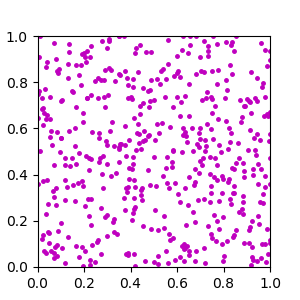

CPU times: user 57.5 s, sys: 1.58 s, total: 59.1 s
Wall time: 1min 3s


<IPython.core.display.Javascript object>


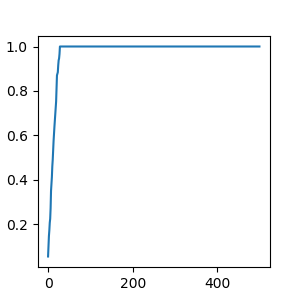

In [4]:
c = Const()
np.random.seed(1)
%time curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3))
plt.plot(curve)

# For this to happen, you would need to go to conda command line
# and run:
# conda install line_profiler

%load_ext line_profiler
%lprun -f model model(c,show_dotses=False)